<a href="https://colab.research.google.com/github/keeeehun/RL/blob/main/numpy_gridworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating GridWorld

이번 노트북에서는 numpy만 사용해서 GridWorld 환경을 구현하는 방법을 살펴보겠습니다.

보통 Gym 환경을 상속받아 사용하지만, 본 실습에서는 numpy만을 사용할 예정입니다.

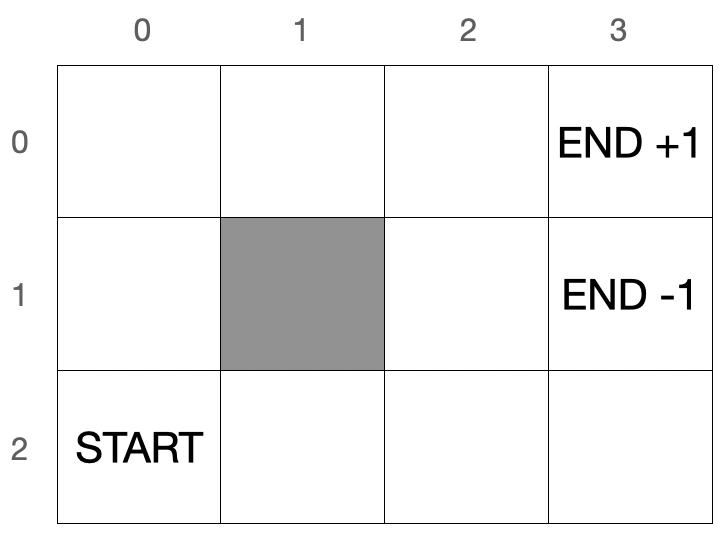



위 그림과 같이 간단한 3x4 크기의 GridWorld를 구현해 볼 것이며, 이 환경에선 아래의 조건을 충족합니다.

1. Agent는 항상 START 위치인 (2,0)에서 시작하며 END에 도착하면 Episode가 종료된다.
2. Agent는 상, 하, 좌, 우로 1칸씩 이동할 수 있으며 이동 불가 장소로 이동하는 경우 제자리에 머무른다.
3. (1,1)에는 WALL이 있어서 저 곳을 가로질러 지나갈 수 없다.
4. END +1인 (0,3)에 도착하면 1을 보상으로 받고, END -1인 (1,3)에 도착하면 -1을 보상으로 받는다.

In [ ]:
import numpy as np

# State
GOAL = (0, 3)
FAIL = (1, 3)
START = (2, 0)

class State(object):

    def __init__(self, state=START):
        self.gridworld = np.zeros([3, 4])
        self.gridworld[1, 1] = -1   # WALL
        self.state = state
        self.isEnd = False

    def nextPosition(self, action):
        """
        action: up, down, left, right
        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if action == "up":
            nextState = (self.state[0] - 1, self.state[1])
        elif action == "down":
            nextState = (self.state[0] + 1, self.state[1])
        elif action == "left":
            nextState = (self.state[0], self.state[1] - 1)
        elif action == "right":
            nextState = (self.state[0], self.state[1] + 1)
        else:
            raise Exception("invalid action")

        # if next state legal, move the agent and update the state
        if (nextState[0] >= 0) and (nextState[0] < 3):
            if (nextState[1] >= 0) and (nextState[1] < 4):
                if nextState != (1, 1):
                    return nextState

        return self.state

    def get_reward(self):
        if self.state == GOAL:
            return 1
        elif self.state == FAIL:
            return -1
        else:
            return 0

    def isEndFunc(self):
        if (self.state == GOAL) or (self.state == FAIL):
            self.isEnd = True

    def render(self):
        self.gridworld[self.state] = 1
        for i in range(0, 3):
            print('-----------------')
            out = '| '
            for j in range(0, 4):
                if self.gridworld[i, j] == 1:
                    token = 'A'
                if self.gridworld[i, j] == -1:
                    token = 'X'
                if self.gridworld[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-----------------')

In [ ]:
class Agent(object):

    def __init__(self):
        self.states = []
        self.actions = ["up", "down", "left", "right"]
        self.State = State()

    def chooseAction(self):
        # choose action with most expected value
        mx_nxt_reward = 0
        action = ""

        action = np.random.choice(self.actions)

        return action

    def takeAction(self, action):
        position = self.State.nextPosition(action)
        return State(state=position)
    
    def reset(self):
        self.states = []
        self.State = State()

    def play(self, rounds=10):
        i = 0
        while i < rounds:
            self.State.render()

            if self.State.isEnd:
                reward = self.State.get_reward()
                print("Game End Reward", reward)
                self.reset()
                i += 1
            else:
                action = self.chooseAction()
                # append trace
                self.states.append(self.State.nextPosition(action))
                print("current position {}, action {}".format(self.State.state, action))
                # by taking the action, it reaches the next state
                self.State = self.takeAction(action)
                # mark is end
                self.State.isEndFunc()
                print("nxt state", self.State.state)
                print("---------------------")


In [ ]:
ag = Agent()
ag.play(1)